In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing what did you find
# Best cities & countries for startups
# What factors determine unicorn startups

In [122]:
# Get cities data
cities21 = pd.read_csv("Lec13_Cities_2021.csv")
cities22 = pd.read_csv("Lec13_Cities_2022.csv")

# Get countries data
countries21 = pd.read_csv("Lec13_Countries_2021.csv")
countries22 = pd.read_csv("Lec13_Countries_2022.csv")

In [134]:
print(cities21.isna().sum())
print()
print(cities22.isna().sum())
print()
print(countries21.isna().sum())
print()
print(countries22.isna().sum())

position                          0
change in position from 2020      0
city                              0
country                           0
total score                       0
quatity score                     0
quality score                     0
business score                    0
sign of change in position      202
dtype: int64

position                            0
change in position from 2021        0
city                                0
total score                         0
quantity score\n                    0
quality score\r\n                   0
business score\r\n                  0
sign of change in position\r\n    180
dtype: int64

ranking                          1
change in position from 2020     1
country                          1
total score                      1
quantity score                   1
quality score                    1
business score                   1
change in position sign         22
dtype: int64

position                        0
change in positi

In [125]:
cities21['city'] = cities21['city'] + ',' + cities21['country']

In [126]:
cities = pd.merge(cities21, cities22, on='city', suffixes=('_2021', '_2022'))
countries = pd.merge(countries21, countries22, on='country', suffixes=('_2021', '_2022'))

In [127]:
cities = cities.rename(columns={"change in position from 2020": "change_in_position_from_2020", "quatity score": "quantity_score_2021", "quality score": "quality_score_2021", "business score": "business_score_2021",
  "sign of change in position": "sign_of_change_in_position_2021"})

cities = cities.rename(columns={"change in position from 2021": "change_in_position_from_2021", "quantity score\n": "quantity_score_2022", "quality score\r\n": "quality_score_2022", "business score\r\n": "business_score_2022",
  "sign of change in position\r\n": "sign_of_change_in_position_2022"})

In [128]:
countries = countries.rename(columns={"change in position from 2020": "change_in_position_from_2020", "quantity score": "quantity_score_2021", "quality score": "quality_score_2021", "business score": "business_score_2021",
  "change in position sign ": "sign_of_change_in_position_2021"})

countries = countries.rename(columns={"change in position": "change_in_position_from_2021", "quantity score\r\n": "quantity_score_2022", "quality score\r\n": "quality_score_2022", "business score\r\n": "business_score_2022",
  "change in position sign\r\n": "sign_of_change_in_position_2022"})

In [131]:
cities['avg_total_score'] = (cities['total score_2021'] + cities['total score_2022']) / 2
cities['avg_quantity_score'] = (cities['quantity_score_2021'] + cities['quantity_score_2022']) / 2
cities['avg_quality_score'] = (cities['quality_score_2021'] + cities['quality_score_2022']) / 2
cities['avg_business_score'] = (cities['business_score_2021'] + cities['business_score_2022']) / 2

countries['avg_total_score'] = (countries['total score_2021'] + countries['total score_2022']) / 2
countries['avg_quantity_score'] = (countries['quantity_score_2021'] + countries['quantity_score_2022']) / 2
countries['avg_quality_score'] = (countries['quality_score_2021'] + countries['quality_score_2022']) / 2
countries['avg_business_score'] = (countries['business_score_2021'] + countries['business_score_2022']) / 2

<ipython-input-133-8162030a1acd>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(city_averaged_features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


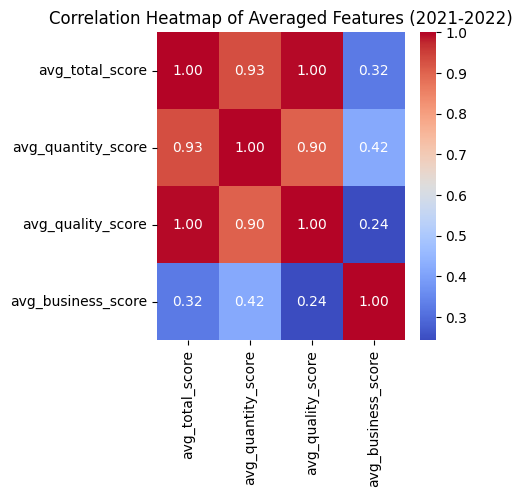

<ipython-input-133-8162030a1acd>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(country_averaged_features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


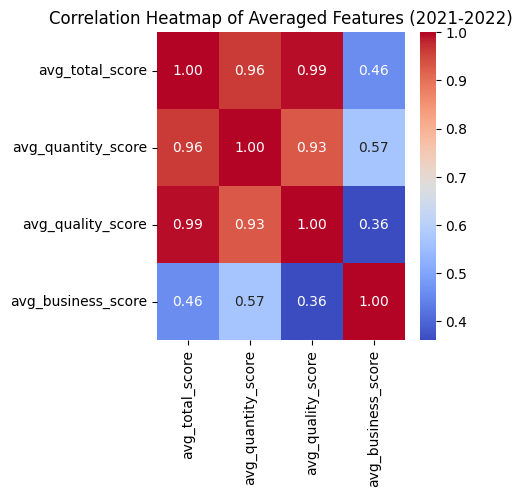

In [133]:
city_averaged_features_df = cities[['avg_total_score', 'avg_quantity_score', 'avg_quality_score', 'avg_business_score', 'change_in_position_from_2020', 'change_in_position_from_2021']]
country_averaged_features_df = countries[['avg_total_score', 'avg_quantity_score', 'avg_quality_score', 'avg_business_score', 'change_in_position_from_2020', 'change_in_position_from_2021']]


# Create a heatmap using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(city_averaged_features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Averaged Features (2021-2022)')
plt.show()

# Create a heatmap using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(country_averaged_features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Averaged Features (2021-2022)')
plt.show()

<Axes: xlabel='change_in_position_from_2021'>

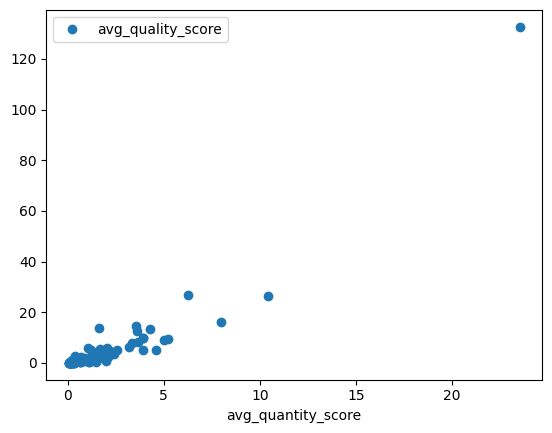

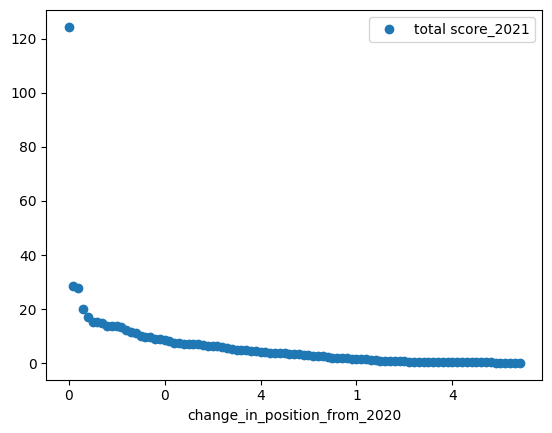

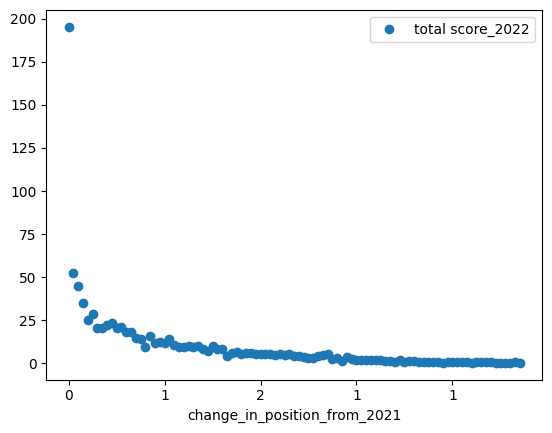

In [136]:
countries.plot(x="avg_quantity_score", y='avg_quality_score', style='o')
countries.plot(x="change_in_position_from_2020", y='total score_2021', style='o')
countries.plot(x="change_in_position_from_2021", y='total score_2022', style='o')

<Axes: xlabel='change_in_position_from_2021'>

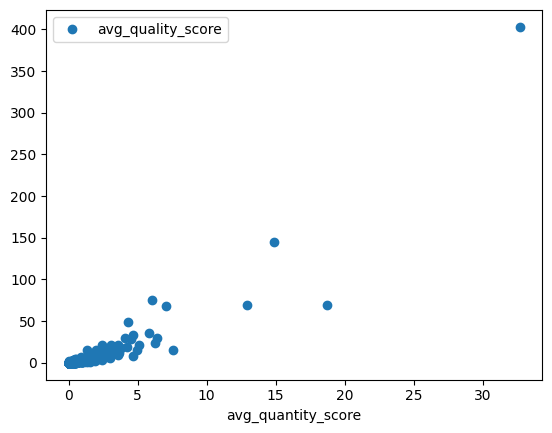

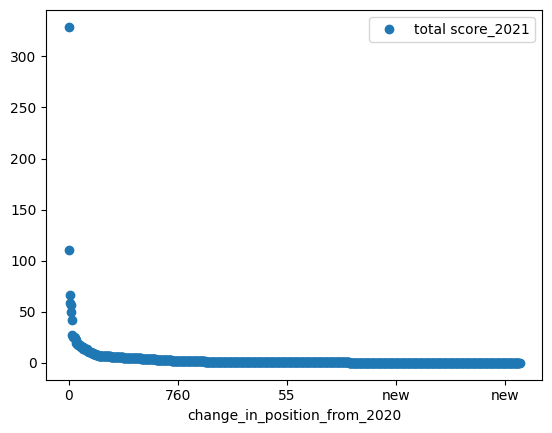

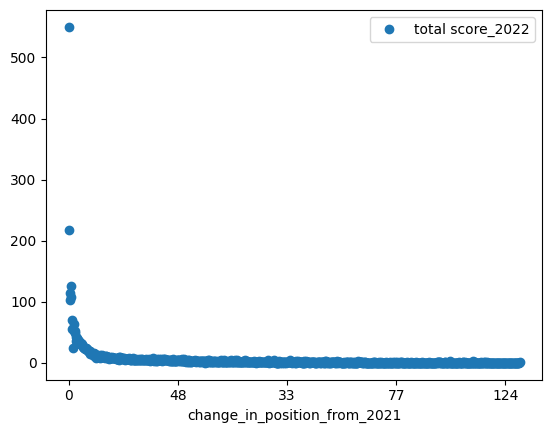

In [137]:
cities.plot(x="avg_quantity_score", y='avg_quality_score', style='o')
cities.plot(x="change_in_position_from_2020", y='total score_2021', style='o')
cities.plot(x="change_in_position_from_2021", y='total score_2022', style='o')

In [63]:
cities.columns

Index(['position_2021', 'change in position from 2020', 'city', 'country',
       'total score_2021', 'quatity score', 'quality score', 'business score',
       'sign of change in position', 'position_2022',
       'change in position from 2021', 'total score_2022', 'quantity score\n',
       'quality score\r\n', 'business score\r\n',
       'sign of change in position\r\n', 'avg_total_score',
       'avg_quantity_score', 'avg_quality_score', 'avg_business_score'],
      dtype='object')

In [144]:
# Total score: The total score of the rankings is a sum of the quantity, quality, and business environment

# Quantity score: Score that takes into account different metrics, such as number of startups, number of coworking spaces, and number of accelerators, to establish the activity level of the startup ecosystem

# Quality score: Score that considers parameters that indicate qualitative results achieved by the ecosystem. These parameters include analyzing the traction of the ecosystem’s top startups, as well as reviewing “special entities” the ecosystem has produced: Unicorns, Exits, and Pantheons

# Business score: A combination of both business and economic indicators at the national level, discounted for cities that haven't reached a critical mass either for Quantity or Quality
best_countries = countries.groupby('country').mean().sort_values(by='avg_total_score', ascending=False).head(3)
best_cities = cities.groupby('city').mean().sort_values(by='avg_total_score', ascending=False).head(3)

print("Best countries for start ups: ", best_countries)
print("-----------------------------------------------------------------------")
print("Best cities for start ups ", best_cities)

Best countries for start ups:                  ranking   total score_2021  quantity_score_2021  \
country                                                           
United States        1.0           124.420                19.45   
United Kingdom       2.0            28.719                 8.16   
Israel               3.0            27.741                 5.48   

                quality_score_2021  business_score_2021  position  \
country                                                             
United States               101.17                 3.80       1.0   
United Kingdom               16.86                 3.70       2.0   
Israel                       19.14                 3.13       3.0   

                total score_2022  quantity_score_2022  quality_score_2022  \
country                                                                     
United States            195.370                27.56              164.15   
United Kingdom            52.554                12.66   

<ipython-input-144-232378eaed9c>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_countries = countries.groupby('country').mean().sort_values(by='avg_total_score', ascending=False).head(3)
<ipython-input-144-232378eaed9c>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_cities = cities.groupby('city').mean().sort_values(by='avg_total_score', ascending=False).head(3)


In [147]:
# Unicorn startup

unicorn_startup_city = cities.loc[cities['avg_quality_score'].idxmax()]
unicorn_startup_country = countries.loc[countries['avg_quality_score'].idxmax()]

print(unicorn_startup_city)
print("-----------------------------------------------------------------------")
print(unicorn_startup_country)

position_2021                                                     1
change_in_position_from_2020                                      0
city                               San Francisco Bay, United States
country                                               United States
total score_2021                                            328.966
quantity_score_2021                                           29.14
quality_score_2021                                           296.02
business_score_2021                                             3.8
sign_of_change_in_position_2021                                 NaN
position_2022                                                     1
change_in_position_from_2021                                      0
total score_2022                                            550.269
quantity_score_2022                                           36.19
quality_score_2022                                           510.42
business_score_2022                             